# matplotlib可视化练习

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [3]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


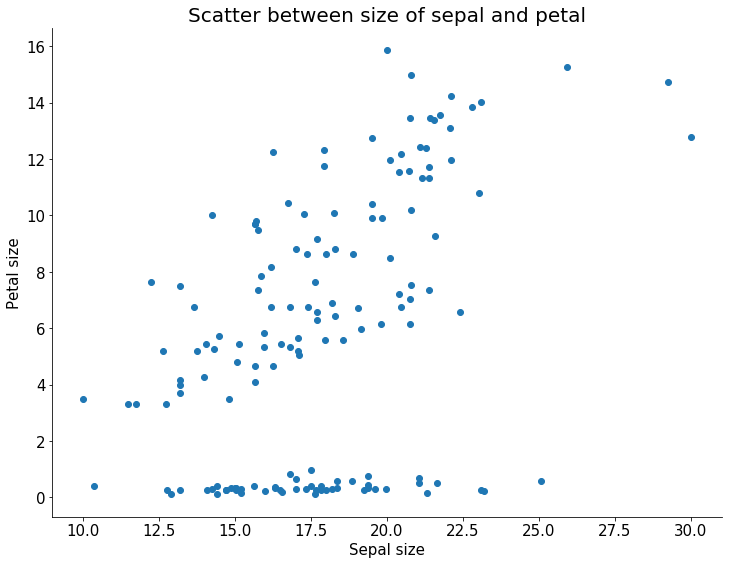

In [4]:
data['sepal_size']=data['sepal_length']*data['sepal_width']
data['petal_size']=data['petal_length']*data['petal_width']
data.head()
_,axe = plt.subplots()
plt.scatter(data['sepal_size'].values,data['petal_size'].values)
plt.xlabel('Sepal size', fontsize=15)
plt.ylabel('Petal size', fontsize=15)
plt.title('Scatter between size of sepal and petal', fontsize=20)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

In [5]:
data['species'].value_counts().index

Index(['setosa', 'virginica', 'versicolor'], dtype='object')

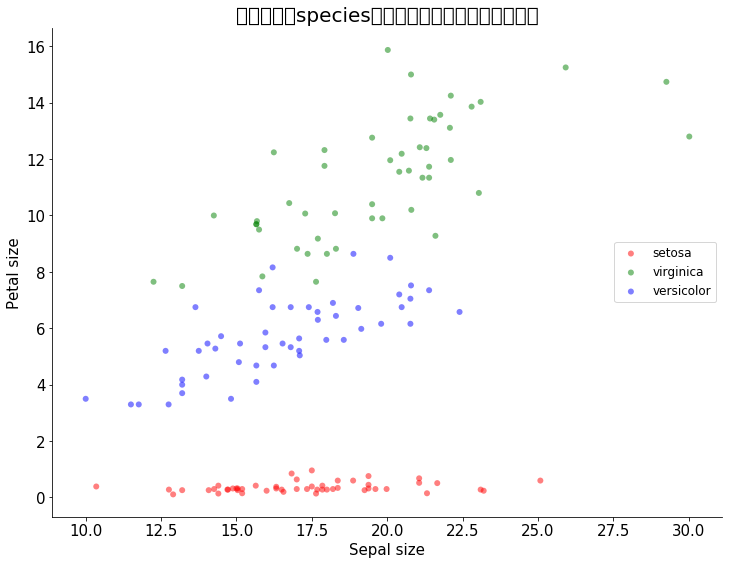

In [10]:
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue']
species = data['species'].value_counts().index
data1 = data.set_index(['species'])
for i,s in enumerate(species):
    ax.scatter(data1['sepal_size'].loc[s], data1['petal_size'].loc[s], c=colors[i], label=s,
               alpha=0.5, edgecolors='none')

ax.legend(loc=5, fontsize=12)
ax.set_xlabel('Sepal size', fontsize=15)
ax.set_ylabel('Petal size', fontsize=15)
plt.title(u'不同种类（species）鸢尾花萼片和花瓣的大小关系', fontsize=20)
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)

sepal_size
petal_size


 Text(0,0,'setosa'),
 Text(0,0,'virginica'),
 Text(0,0,'versicolor'),
 Text(0,0,'setosa'),
 Text(0,0,'virginica'),
 Text(0,0,'versicolor')]

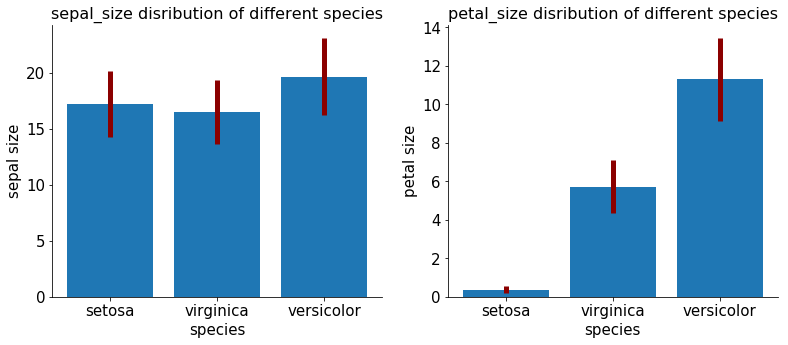

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(13,5))

species=data['species'].value_counts().index
sepals=[data1['sepal_size'].loc[s] for s in species]
distribute=data.groupby('species').agg([np.mean,np.std])
for i,s in enumerate(['sepal_size','petal_size']):
    print(s)
    axes[i].bar(range(3),distribute[s]['mean'])
    axes[i].errorbar(range(3),distribute[s]['mean'],distribute[s]['std'],ls='none',lw=5,color='darkred')
    axes[i].set_ylabel(s.replace('_',' '),fontsize=15)
    axes[i].set_xlabel('species',fontsize=15)
    axes[i].spines['top'].set_color(None)
    axes[i].spines['right'].set_color(None)
    axes[i].set_title(u'{} disribution of different species'.format(s.replace(' ',' ')),fontsize=16)
plt.setp(axes,xticks=range(3),xticklabels=species)


Poly((0.85, 15.04) ...)
pink
Poly((1.85, 17.43) ...)
lightblue
Poly((2.85, 14.3475) ...)
lightgreen
Poly((0.85, 0.28) ...)
pink
Poly((1.85, 9.7175) ...)
lightblue
Poly((2.85, 4.86) ...)
lightgreen


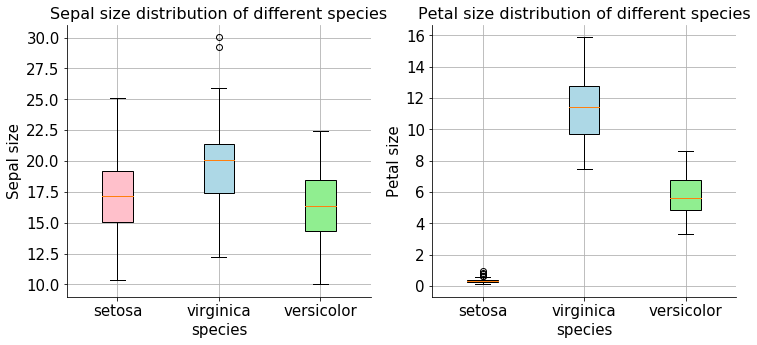

In [13]:
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sepals = [data1['sepal_size'].loc[s] for s in species]
petals = [data1['petal_size'].loc[s] for s in species]

bplot0 = axes[0].boxplot(sepals, patch_artist=True)
bplot1 = axes[1].boxplot(petals, patch_artist=True)

axes[0].set_title(u'Sepal size distribution of different species', fontsize=16)
axes[1].set_title(u'Petal size distribution of different species', fontsize=16)
axes[0].set_ylabel('Sepal size', fontsize=15)
axes[1].set_ylabel('Petal size', fontsize=15)

colors=['pink','lightblue','lightgreen']
for bplot in (bplot0,bplot1):
    for patch, color in zip(bplot['boxes'],colors):
        patch.set_facecolor(color)
plt.setp(axes,xticks=list(range(1,len(species)+1)),xticklabels=species)
for a in axes:
    a.set_xlabel('species', fontsize=15)
    a.grid(True)
    
